#Laboratorio 4 - Regularizacion - Regresion multivariable

Se implementa la regresion lineal multivariable al dataset Property sales:Melbourne City.

Para X se toman 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Price'

Mientras que para y se toma 'Price'

El objetivo es predecir el precio de las propiedades en la ciudad de Melbourne tomando en cuenta la cantidad de habitaciones, distancia al centro de la ciudad, nro de habitaciones, baños y autos.

Link github:

Link dataset: https://www.kaggle.com/datasets/amalab182/property-salesmelbourne-city


In [ ]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Leer el archivo csv desde el Google Drive
df = pd.read_csv('/content/gdrive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL/datasets/Property Sales of Melbourne City.csv')

In [ ]:
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
# Limpiando el dataset
datasets=df.drop(['Suburb','Address','Type','Method','SellerG','Date','Postcode','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'], axis=1).astype(float)

In [ ]:
datasets

,Unnamed: 0,Rooms,Price,Distance,Bedroom2,Bathroom,Car
0,1.0,2.0,1480000.0,2.5,2.0,1.0,1.0
1,2.0,2.0,1035000.0,2.5,2.0,1.0,0.0
2,4.0,3.0,1465000.0,2.5,3.0,2.0,0.0
3,5.0,3.0,850000.0,2.5,3.0,2.0,1.0
4,6.0,4.0,1600000.0,2.5,3.0,1.0,2.0
...,...,...,...,...,...,...,...
18391,23540.0,2.0,622500.0,6.8,2.0,2.0,1.0
18392,23541.0,4.0,2500000.0,6.8,4.0,1.0,5.0
18393,23544.0,4.0,1100000.0,12.7,4.0,3.0,2.0
18394,23545.0,4.0,1285000.0,6.3,4.0,1.0,1.0


In [ ]:
dataset=datasets.dropna()

Analisis del Dataset mostrando Informacion

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 0 to 18395
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14820 non-null  float64
 1   Rooms       14820 non-null  float64
 2   Price       14820 non-null  float64
 3   Distance    14820 non-null  float64
 4   Bedroom2    14820 non-null  float64
 5   Bathroom    14820 non-null  float64
 6   Car         14820 non-null  float64
dtypes: float64(7)
memory usage: 926.2 KB


In [ ]:
#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['Price'], axis=1).values
y_test = test_dataset['Price'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['Price'], axis=1).values
y_train = train_dataset['Price'].values
m_train = len(y_test)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}'.format(
        X_train[i, 0],
        X_train[i, 1],
        X_train[i, 2],
        X_train[i, 3],
        X_train[i, 4],
        X_train[i, 5],
        y_train[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5]       Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   22720       4        12         4       2       2  785000
    8290       3         9         3       1       2  821000
   18128       3         5         3       2       1 1007000
   15918       3         2         3       3       3 1425000
    7433       4         6         3       2       1 1900000
   22578       3        32         3       1       1  501000
   14284       3        12         3       1       2  805000
   19517       3        14         3       1       4  620500
    2188       3         5         3       2       3  810000
   16310       2        14         2       1       1  878000


In [ ]:
#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(dataset)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 11856 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 2964 de ejemplos
La cantidad total de ejemplos es de: 14820 de ejemplos


Funcion para Normalización de características

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)

    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Funcion para graficar

In [ ]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

Funcion del error cuadratico medio

In [ ]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

Funcion del calculo del costo con regularizacion

In [ ]:
#aumentamos el parametro de lambda para aplicar regularizacion
#Creamos la funcion de calcular costo
def calcularCostoCR(X, y, theta, lambda_):
    m = y.size
    J = 0

    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

Funcion descenso por el gradiente con regularizacion

In [ ]:
#Creamos la funcion para calcular el descenso por Gradiente
#tambien introducimos el parametro lambda_ para aplicar regularizacion
def calcularDescensoGradienteCR(X, y, theta, alpha,lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):

        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]

        # theta = theta*(1-((alpha*lambda_)/m)) - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # se hace uso de la funcion de costo para calcular el costo en cada iteracion, sin olvidar del parametro lambda_
        J_historico.append(calcularCostoCR(X, y, theta, lambda_))

    return theta, J_historico

Funcion del costo sin regularizacion

In [ ]:
def calcularCostoSR(X, y, theta):
    m = y.size
    J = 0
    #h = np.dot(X, theta)
    # print(h)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Funcion Descenso por el gradiente sin regularizacion

In [ ]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradienteSR(X, y, theta, alpha, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion
        J_historico.append(calcularCostoSR(X, y, theta))

    return theta, J_historico

Funcion del calculo de la ecuacion de la normal con regularizacion

In [ ]:
def calcularThethaEcuacionNormalCR(X, y, lambda_):
    m,n = X.shape

    # Creamos la matriz L
    L = np.eye(n)  # Matriz identidad de tamaño (n+1) x (n+1)
    L[0, 0] = 0  # Establecemos el primer elemento de la matriz L en 0

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + (lambda_*L)), np.transpose(X)),y)

    return theta

Funcion del calculo de la ecuacion de la normal sin regularizacion

In [ ]:
def calcularThethaEcuacionNormalSR(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

# ***Usando 'Regularizacion'***

**Regresión Lineal Multivariable**

Cargando los datos

In [ ]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

Normalizacion de Caracteristicas

In [ ]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0],
        X_norm_RLM[i, 1],
        X_norm_RLM[i, 2],
        X_norm_RLM[i, 3],
        X_norm_RLM[i, 4],
        X_norm_RLM[i, 5], ))


    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.559     1.113     0.277     1.127     0.665     0.400
    -0.553     0.068    -0.251     0.090    -0.787     0.400
     0.887     0.068    -0.812     0.090     0.665    -0.641
     0.563     0.068    -1.307     0.090     2.117     1.441
    -0.678     1.113    -0.796     0.090     0.665    -0.641
     1.538     0.068     3.527     0.090    -0.787    -0.641
     0.324     0.068     0.293     0.090    -0.787     0.400
     1.090     0.068     0.607     0.090    -0.787     2.482
    -1.446     0.068    -0.845     0.090     0.665     1.441
     0.621    -0.978     0.574    -0.946    -0.787    -0.641


Agregando de la culumna de '1' a la matriz

In [ ]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0],
        X_ready_RLM[i, 1],
        X_ready_RLM[i, 2],
        X_ready_RLM[i, 3],
        X_ready_RLM[i, 4],
        X_ready_RLM[i, 5],
        X_ready_RLM[i, 6]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000     1.559     1.113     0.277     1.127     0.665     0.400
     1.000    -0.553     0.068    -0.251     0.090    -0.787     0.400
     1.000     0.887     0.068    -0.812     0.090     0.665    -0.641
     1.000     0.563     0.068    -1.307     0.090     2.117     1.441
     1.000    -0.678     1.113    -0.796     0.090     0.665    -0.641
     1.000     1.538     0.068     3.527     0.090    -0.787    -0.641
     1.000     0.324     0.068     0.293     0.090    -0.787     0.400
     1.000     1.090     0.068     0.607     0.090    -0.787     2.482
     1.000    -1.446     0.068    -0.845     0.090     0.665     1.441
     1.000     0.621    -0.978     0.574    -0.946    -0.787    -0.641


Calculo del Costo

In [ ]:
theta_RLM=np.array([0.2, 3.0, 0.2, 0.1, 3.0, 0.2, 1.1])
theta_RLM1=np.array([0.1, 2.0, 0.5, 0.2, 8.0, 0.7, 1.3])

lambda_ = 1000
print(theta_RLM.shape[0])
print(f"----------")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM, lambda_)}")
print(f"----------")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM1, lambda_)}")

7
----------
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1] se obtiene un costo de: 773078205009.6705
----------
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3] se obtiene un costo de: 773076477323.8431


Descenso por el gradiente

In [ ]:
#creamos un theta de ceros con el tamaño de las columnas de nuestra X
theta = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 6000, un alpha 0.00009 y un lambda de 1000
num_ite_RLM = 6000
alpha_RLM = 0.0009
lambda_RLM = 1000

theta_RLM, J_historico_RLM = calcularDescensoGradienteCR(X_ready_RLM, y_trainRLM, theta , alpha_RLM,lambda_RLM, num_ite_RLM)
print("----------")
print("Los valores de theta calculados son:")
i = 0
for tht_RLM in theta_RLM:
    i += 1
    print(f"theta {i}: {tht_RLM}")

print(f"----------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")

print("la cantidad de theta son: ", theta_RLM.shape[0])

----------
Los valores de theta calculados son:
theta 1: 1061420.5103721088
theta 2: -25101.388084315284
theta 3: 152157.04479868858
theta 4: -189321.45134141683
theta 5: 112352.11935326242
theta 6: 138347.4075737361
theta 7: 48046.81464858034
----------
con un costo de: 128432459054.78777 
la cantidad de theta son:  7


Grafica de la convergencia del costo

Text(0, 0.5, 'Costo J')

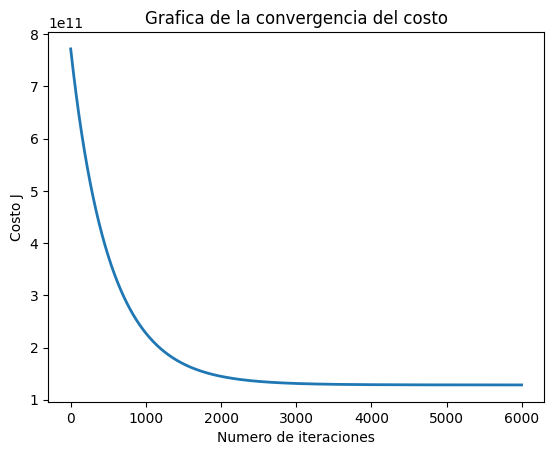

In [ ]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Grafica de la regresión lineal

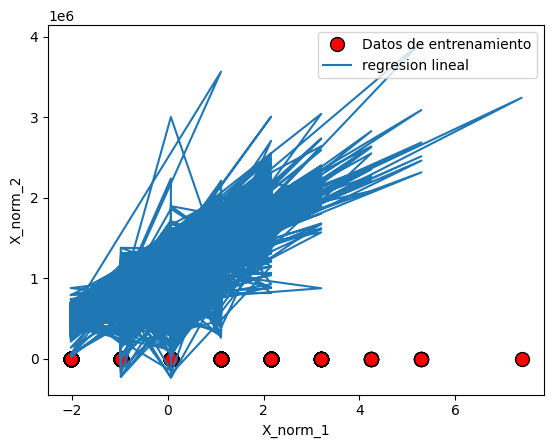

In [ ]:
graficarDatos(X_norm_RLM[:, 1],  X_norm_RLM[:, 2] , "X_norm_1", "X_norm_2")

pyplot.plot(X_norm_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

Prueba

In [ ]:
X_arrayRLM = np.array([1475229326,	1.21,	48.0,	30.46,	59.0,	177.39,	5.62])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La radiacion es de : {prediccion_RLM}")

La radiacion es de : [1.56583871e+15]


Ejemplos de Predicciones

In [ ]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1475214923,1.22,50,30.46,47,157.78,6.75],
    [1475214622,1.24,50,30.46,46,151.6,3.37],
    [1475214325,1.25,50,30.46,47,105.78,4.5],
    [1475214022,1.19,50,30.46,48,135.55,4.5],
    [1475213722,1.19,50,30.46,56,140.92,4.5],
    [1475213121,1.19,51,30.46,55,126.63,3.37],
    [1475212820,1.23,51,30.46,54,119.97,4.5],
    [1475212522,1.22,51,30.45,53,95.57,2.25],
    [1475212224,1.24,51,30.45,51,100.02,4.5],
    [1475211920,1.24,51,30.45,51,111.73,2.25],
    [1475211319,1.23,51,30.45,51,105.89,6.75]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['Unnamed','Rooms','Distance','Bedroom2','Bathroom','Car','Price']
# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

8
7
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
|             |   Unnamed |   Rooms |   Distance |   Bedroom2 |   Bathroom |   Car |       Price |
+=============+===========+=========+============+============+============+=======+=============+
| 1.47521e+09 |      1.22 |      50 |      30.46 |         47 |     157.78 |  6.75 | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.24 |      50 |      30.46 |         46 |     151.6  |  3.37 | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.25 |      50 |      30.46 |         47 |     105.78 |  4.5  | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.19 |      50 |      30.46 |         48 |     135.55 |  4.5  | 1.56582e+15 |
+-----

Validaciones

In [ ]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 243855726046.00067
Raíz del Error Cuadrático Medio (RMSE) = 493817.5027740518


# ***Usando sin 'Regularizacion'***

**Regresión Lineal Multivariable**

In [ ]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

Normalizacion de caracteristicas

In [ ]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0],
        X_norm_RLM[i, 1],
        X_norm_RLM[i, 2],
        X_norm_RLM[i, 3],
        X_norm_RLM[i, 4],
        X_norm_RLM[i, 5],
        ))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.559     1.113     0.277     1.127     0.665     0.400
    -0.553     0.068    -0.251     0.090    -0.787     0.400
     0.887     0.068    -0.812     0.090     0.665    -0.641
     0.563     0.068    -1.307     0.090     2.117     1.441
    -0.678     1.113    -0.796     0.090     0.665    -0.641
     1.538     0.068     3.527     0.090    -0.787    -0.641
     0.324     0.068     0.293     0.090    -0.787     0.400
     1.090     0.068     0.607     0.090    -0.787     2.482
    -1.446     0.068    -0.845     0.090     0.665     1.441
     0.621    -0.978     0.574    -0.946    -0.787    -0.641


Agregando la columna de 1 ala matriz

In [ ]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0],
        X_ready_RLM[i, 1],
        X_ready_RLM[i, 2],
        X_ready_RLM[i, 3],
        X_ready_RLM[i, 4],
        X_ready_RLM[i, 5],
        X_ready_RLM[i, 6]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000     1.559     1.113     0.277     1.127     0.665     0.400
     1.000    -0.553     0.068    -0.251     0.090    -0.787     0.400
     1.000     0.887     0.068    -0.812     0.090     0.665    -0.641
     1.000     0.563     0.068    -1.307     0.090     2.117     1.441
     1.000    -0.678     1.113    -0.796     0.090     0.665    -0.641
     1.000     1.538     0.068     3.527     0.090    -0.787    -0.641
     1.000     0.324     0.068     0.293     0.090    -0.787     0.400
     1.000     1.090     0.068     0.607     0.090    -0.787     2.482
     1.000    -1.446     0.068    -0.845     0.090     0.665     1.441
     1.000     0.621    -0.978     0.574    -0.946    -0.787    -0.641


Cálculo del Costo

In [ ]:
theta_RLM=np.array([0.2, 3.0, 0.2, 0.1, 3.0, 0.2, 1.1])
theta_RLM1=np.array([0.1, 2.0, 0.5, 0.2, 8.0, 0.7, 1.3])
print(theta.shape[0])
print(f"----------")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM)}")
print(f"----------")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM1)}")

7
----------
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1] se obtiene un costo de: 773078205008.8566
----------
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3] se obtiene un costo de: 773076477320.8712


Descenso por el Gradiente

In [ ]:
#creamos un theta con 19 columnas de ceros
theta_RLM = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 6000 y un alpha 0.00009
num_ite_RLM = 6000
alpha_RLM = 0.0009

theta_RLM, J_historico_RLM = calcularDescensoGradienteSR(X_ready_RLM, y_trainRLM, theta_RLM, alpha_RLM, num_ite_RLM)
print("----------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_RLM:
    i += 1
    print(f"theta {i}: {tht}")

print(f"----------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")
print("la cantidad de theta son: ", theta.shape[0])

----------
Los valores de theta calculados son:
theta 1: 1061420.5103721095
theta 2: -23576.003743447352
theta 3: 163010.61620301762
theta 4: -209792.77037953923
theta 5: 114208.67499693453
theta 6: 144720.1980170046
theta 7: 49810.46327299952
----------
con un costo de: 124119489226.1352 
la cantidad de theta son:  7


Gráfica de la Convergencia de Datos

Text(0, 0.5, 'Costo J')

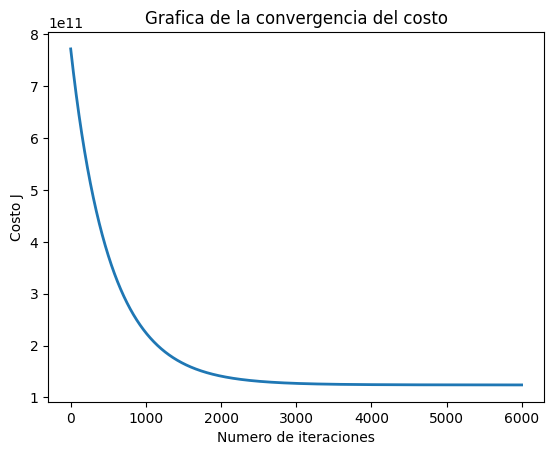

In [ ]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Grafica de la Regresión Lienal

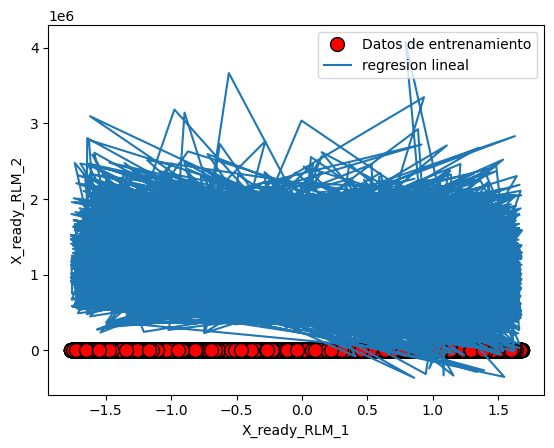

In [ ]:
graficarDatos(X_ready_RLM[:, 1],  X_ready_RLM[:, 2] , "X_ready_RLM_1", "X_ready_RLM_2")

pyplot.plot(X_ready_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

Prueba

In [ ]:
X_arrayRLM = np.array([1475229326,	1.21,	48.0,	30.46,	59.0,	177.39,	5.62])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La prediccion de la casa es de: {prediccion_RLM}")

La prediccion de la casa es de: [1.56583871e+15]


Ejemplos

In [ ]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1475214923,1.22,50,30.46,47,157.78,6.75],
    [1475214622,1.24,50,30.46,46,151.6,3.37],
    [1475214325,1.25,50,30.46,47,105.78,4.5],
    [1475214022,1.19,50,30.46,48,135.55,4.5],
    [1475213722,1.19,50,30.46,56,140.92,4.5],
    [1475213121,1.19,51,30.46,55,126.63,3.37],
    [1475212820,1.23,51,30.46,54,119.97,4.5],
    [1475212522,1.22,51,30.45,53,95.57,2.25],
    [1475212224,1.24,51,30.45,51,100.02,4.5],
    [1475211920,1.24,51,30.45,51,111.73,2.25],
    [1475211319,1.23,51,30.45,51,105.89,6.75]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['Unnamed','Rooms','Distance','Bedroom2','Bathroom','Car','Price']
# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

8
7
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
|             |   Unnamed |   Rooms |   Distance |   Bedroom2 |   Bathroom |   Car |       Price |
+=============+===========+=========+============+============+============+=======+=============+
| 1.47521e+09 |      1.22 |      50 |      30.46 |         47 |     157.78 |  6.75 | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.24 |      50 |      30.46 |         46 |     151.6  |  3.37 | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.25 |      50 |      30.46 |         47 |     105.78 |  4.5  | 1.56582e+15 |
+-------------+-----------+---------+------------+------------+------------+-------+-------------+
| 1.47521e+09 |      1.19 |      50 |      30.46 |         48 |     135.55 |  4.5  | 1.56582e+15 |
+-----

Validaciones

In [ ]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 243118798029.98926
Raíz del Error Cuadrático Medio (RMSE) = 493070.783995553


# **Informe**

1. Respecto a la precision
   El error cuadratico medio con regularizacion

*   El error cuadratico medio con regularizacion 243855726046.00067
*   El error cuadratico medio sin regularizacion 243118798029.98926

Se puede notar que el modelo con regularizacion puede ser mejor



2. Respecto al Calculo del Costo


*   Costo Calculado del modelo con regularizacion 128432459054.78777
*   Costo Calculado del modelo sin regularizacion 124119489226.1352

El modelo sin regularizacion es menor al modelo aplicado con regularizacion, debido a que con regularizacion se incrementa el parametro de lamda y esto hace elevar el costo


El mejor modelo es aquel que se aplica con "Regularizacion", porque el costo puede ser elevado y seria mucho mejor si se aplica en circunstancias donde el numero de iteraciones sea demasiado alta.
El modelo sin regularizacion seria mejor aplicado en circunstancias donde se tengan menos parametros.